<a href="https://colab.research.google.com/github/Tclack88/Renewable-Energy/blob/master/rooftop_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# contents of requirements.txt

content = """PyYAML == 5.3.1
albumentations == 0.5.0
numpy == 1.19.2
opencv_python_headless == 4.4.0.44
py_oneliner == 0.0.1
scikit_learn == 0.23.2
torch
torchvision
tqdm == 4.51.0"""

with open('requirements.txt','w') as f:
  f.write(content)
  
!cat requirements.txt

PyYAML == 5.3.1
albumentations == 0.5.0
numpy == 1.19.2
opencv_python_headless == 4.4.0.44
py_oneliner == 0.0.1
scikit_learn == 0.23.2
torch
torchvision
tqdm == 4.51.0

# installation and model training
https://github.com/fuzailpalnak/building-footprint-segmentation

In [43]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 27.9 MB/s 
     |████████████████████████████████| 70 kB 7.6 MB/s 
     |████████████████████████████████| 14.5 MB 38.3 MB/s 
     |████████████████████████████████| 36.7 MB 1.3 MB/s 
     |████████████████████████████████| 6.8 MB 59.0 MB/s 
     |████████████████████████████████| 70 kB 9.3 MB/s 
     |████████████████████████████████| 948 kB 56.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=aeb1a7f21e400ff9bfdfc67b13c41823103efe6e92c111d753d762d17a5e7d13
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
  Created wheel for py-oneliner: filename=py_oneliner-0.0.1-py3-none-any.whl size=3695 sha256=78da98c4a8c1b27bca8e56cf1a926bb814cb5240c56daa960f78c6a1f04a8267
  Stored in directory: /root/.cache/pip/wheels/60/1d/9c/e41b84d872c303b

In [ ]:
!git clone https://github.com/fuzailpalnak/building-footprint-segmentation.git

Cloning into 'building-footprint-segmentation'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 390 (delta 31), reused 74 (delta 30), pack-reused 307
Receiving objects: 100% (390/390), 100.34 KiB | 11.15 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [ ]:
!mv building-footprint-segmentation/requirements.txt .
!ls

building-footprint-segmentation  requirements.txt  sample_data


In [1]:
!pip install building_footprint_segmentation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import sys
import json
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from building_footprint_segmentation.segmentation import init_segmentation, read_trainer_config
from building_footprint_segmentation.helpers.callbacks import CallbackList, load_callback
from building_footprint_segmentation.trainer import Trainer

In [5]:
segmentation = init_segmentation("binary")

In [6]:
augmenters = {'transform': {'__class_fullname__': 'albumentations.core.composition.Compose', 'bbox_params': None, 'keypoint_params': None, 'p': 1, 'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.HorizontalFlip', 'always_apply': False, 'p': 0.5}]}}
print(json.dumps(augmenters, indent=2))


{
  "transform": {
    "__class_fullname__": "albumentations.core.composition.Compose",
    "bbox_params": null,
    "keypoint_params": null,
    "p": 1,
    "transforms": [
      {
        "__class_fullname__": "albumentations.augmentations.transforms.HorizontalFlip",
        "always_apply": false,
        "p": 0.5
      }
    ]
  }
}


In [ ]:
#[ReFineNetLite, MFRN, ReFineNet] # "AlBuNet" doesn't work, change
model_name = "ReFineNet"
root_folder = r'./data'
out_folder = r'./out_data'
# for data you will have to download and split the data the library does not handle data 
# splits the library expects the data be present in the following format
# ├── train
# │   ├── images          # images to train
# │   ├── labels          # corresponding ground truth
# |
# ├── val
# │   ├── images          # images to validate
# │   ├── labels          # corresponding ground truth
# │
# ├── test
# │   ├── images 
# and for logging it could be any directory and if the directory does not exists then the library creates one.

model = segmentation.load_model(name=model_name)
criterion = segmentation.load_criterion(name="BinaryCrossEntropy")
loader = segmentation.load_loader(
    root_folder=root_folder,
    image_normalization="divide_by_255",
    label_normalization="binary_label",
    augmenters=augmenters,
    batch_size=2,
)
metrics = segmentation.load_metrics(
    data_metrics=["accuracy", "precision", "f1", "recall", "iou"]
)

optimizer = segmentation.load_optimizer(model, name="Adam")

callbacks = CallbackList([BinaryTestCallback(out_folder)])

# Ouptut from all the callbacks caller will be stored at the path specified in log_dir
for caller in  ["TrainChkCallback", "TimeCallback", "TensorBoardCallback", "TrainStateCallback", "BinaryTestCallback"]:
    callbacks.append(load_callback(out_folder, caller))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


ValueError: ignored

In [ ]:
trainer = Trainer(
    model=model,
    criterion=criterion,
    loader=loader,
    metrics=metrics,
    callbacks=callbacks,
    optimizer=optimizer,
    scheduler=None,
)

# USE MODEL FROM PRETRAINED WEIGHTS

<class 'PIL.PngImagePlugin.PngImageFile'>


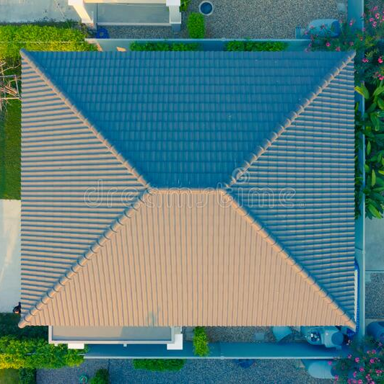

In [7]:
from PIL import Image
def crop_and_resize(image_path):
  # crop image to square about center, then resize to 384x384
  if type(image_path) == str:
    im = Image.open(image_path)
  else:
    im = image_path
  print(type(im))
  width, height = im.size   # Get dimensions
  new_size = min(width,height)

  left = (width - new_size)/2
  top = (height - new_size)/2
  right = (width + new_size)/2
  bottom = (height + new_size)/2

  # Crop the center of the image
  im = im.crop((left, top, right, bottom))
  im = im.resize((384,384))
  return im
crop_and_resize('pristine_rooftop_sample.png')

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [54]:
import cv2
from building_footprint_segmentation.seg.binary.models import ReFineNet
from building_footprint_segmentation.helpers.normalizer import min_max_image_net
from building_footprint_segmentation.utils.py_network import (
    to_input_image_tensor,
    add_extra_dimension,
    convert_tensor_to_numpy,
    load_parallel_model
)
from building_footprint_segmentation.utils.operations import handle_image_size
from torch.utils import model_zoo

MAX_SIZE = 384
MODEL_URL = "https://github.com/fuzailpalnak/building-footprint-segmentation/releases/download/alpha/refine.zip"


def get_model():
    refine_net = ReFineNet()
    state_dict = model_zoo.load_url(MODEL_URL, progress=True, map_location="cpu")
    refine_net.load_state_dict(state_dict)
    return refine_net


def extract(original_image, model):

    original_height, original_width = original_image.shape[:2]

    if (original_height, original_width) != (MAX_SIZE, MAX_SIZE):
        original_image = handle_image_size(original_image, (MAX_SIZE, MAX_SIZE))

    # Apply Normalization
    normalized_image = min_max_image_net(img=original_image)

    tensor_image = add_extra_dimension(to_input_image_tensor(normalized_image))

    with torch.no_grad():
        # Perform prediction
        prediction = model(tensor_image)
        prediction = prediction.sigmoid()

    prediction_binary = convert_tensor_to_numpy(prediction[0]).reshape(
        (MAX_SIZE, MAX_SIZE)
    )

    prediction_3_channels = cv2.cvtColor(prediction_binary, cv2.COLOR_GRAY2RGB)

    dst = cv2.addWeighted(
        original_image,
        1,
        (prediction_3_channels * (0, 255, 0)).astype(np.uint8),
        0.4,
        0,
    )
    return prediction_binary, prediction_3_channels, dst


def run(image_path):
    # original_image = cv2.imread(image_path)

    pil_image = Image.open(image_path)
    original_image = crop_and_resize(pil_image).convert('RGB')
    original_image = np.array(original_image)
    # Convert RGB to BGR 
    original_image = original_image[:, :, ::-1].copy() 

    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    model = get_model()
    # PARALLELIZE the model if gpu available
    # model = load_parallel_model(model)
    
    prediction_binary, prediction_3_channels, dst = extract(original_image, model)
    return prediction_binary, prediction_3_channels, dst



In [ ]:
!wget "https://www.nearmap.com/content/dam/nearmap/blog-imagery/nearmap-blog-au/roof-pitch-and-area/aerial-roofing-colorful-rothwell-qld-2018-07-26.png?format=pjpg&auto=webp&width=3840"

--2022-07-03 08:53:02--  https://www.nearmap.com/content/dam/nearmap/blog-imagery/nearmap-blog-au/roof-pitch-and-area/aerial-roofing-colorful-rothwell-qld-2018-07-26.png?format=pjpg&auto=webp&width=3840
Resolving www.nearmap.com (www.nearmap.com)... 151.101.2.224, 151.101.66.224, 151.101.130.224, ...
Connecting to www.nearmap.com (www.nearmap.com)|151.101.2.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448384 (438K) [image/jpeg]
Saving to: ‘aerial-roofing-colorful-rothwell-qld-2018-07-26.png?format=pjpg&auto=webp&width=3840’

aerial-roofing-colo 100%[===================>] 437.88K  --.-KB/s    in 0.02s   

2022-07-03 08:53:03 (18.9 MB/s) - ‘aerial-roofing-colorful-rothwell-qld-2018-07-26.png?format=pjpg&auto=webp&width=3840’ saved [448384/448384]



In [62]:
# Random image from the internet
# image_path = "small_rooftop_sample.png" # this was smaller than 384x384 and failed TODO find out why (though probably not a problem)
image_path = "pristine_rooftop_sample.png"
# image_path = "large_horizontal_roof.jpg"
image_path = "exact_rooftop_sample.png"
image_path = 'small_neigborhood_sample.png'
prediction_binary, prediction_3_channels, dst = run(image_path)

<class 'PIL.PngImagePlugin.PngImageFile'>


/usr/local/lib/python3.7/dist-packages/torch/hub.py:518: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


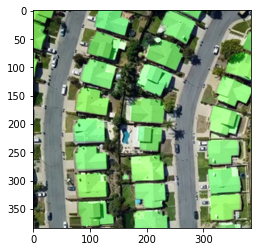

In [63]:
# from PIL import Image
plt.imshow(dst);
# plt.imshow(prediction_binary);

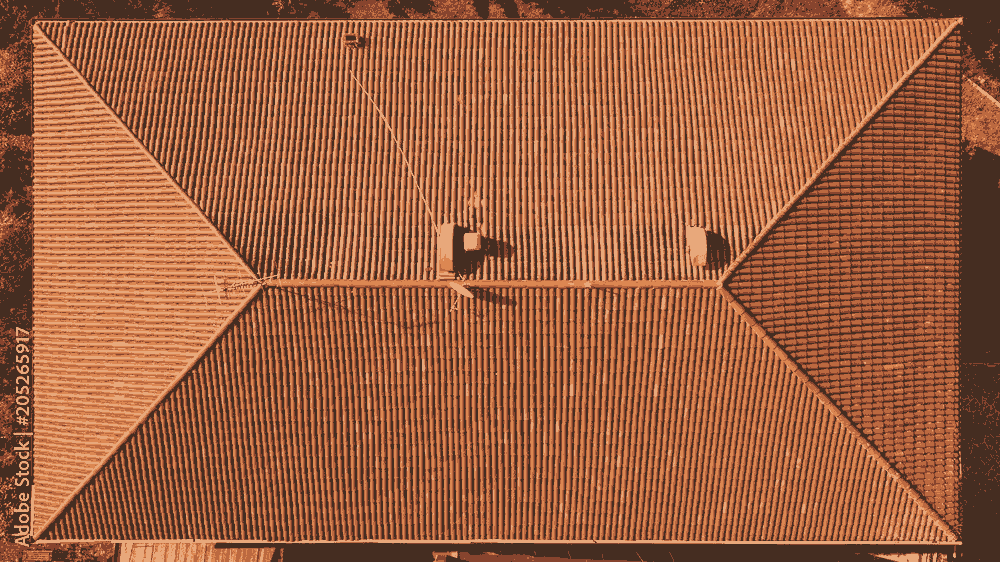

In [19]:
# import matplotlib.pylab as plt
# import numpy as np
# from scipy.spatial import Voronoi, voronoi_plot_2d
# import scipy.ndimage as ndimage

# img_file = 'large_horizontal_roof.jpg'
# img = plt.imread(img_file)

# points = [] 
# for i in range(100):
#     points.append([np.random.uniform(0, img.shape[0]),np.random.uniform(0, img.shape[1])])
# points = np.array(points)

# vor = Voronoi(points)

# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
# ax.imshow(ndimage.rotate(img, 90))
# voronoi_plot_2d(vor, point_size=10, ax=ax)
# plt.show()


from PIL import Image, ImageFilter
  
  
image = Image.open(r"large_horizontal_roof.jpg")
result = image.convert('P', palette=Image.ADAPTIVE, colors=5)
display(result)


In [9]:
from google.colab.patches import cv2_imshow

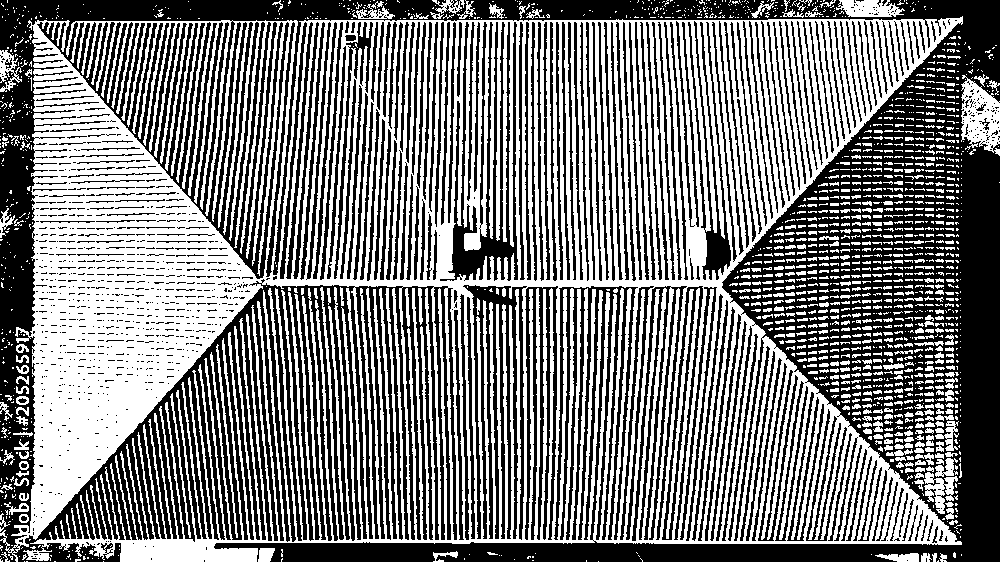

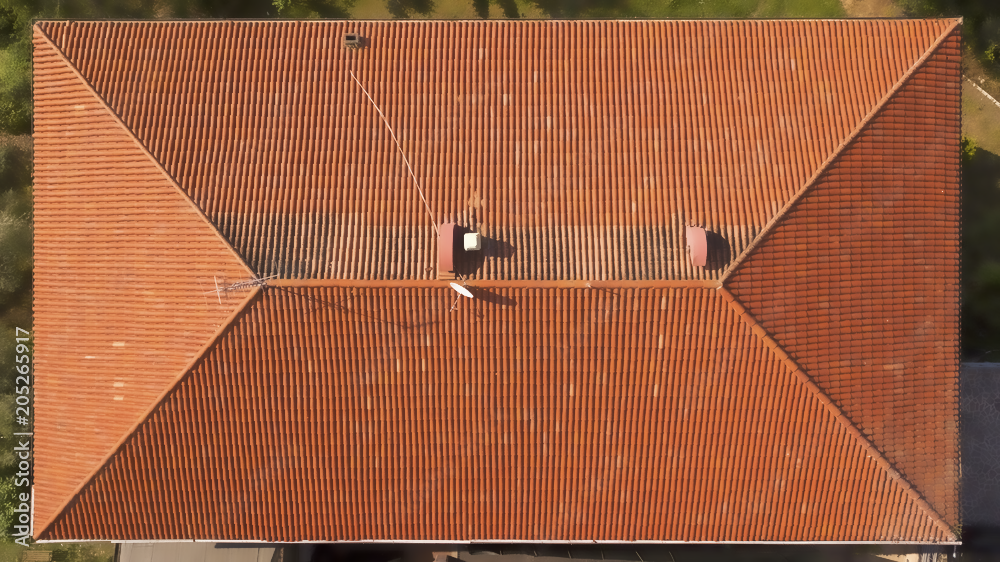

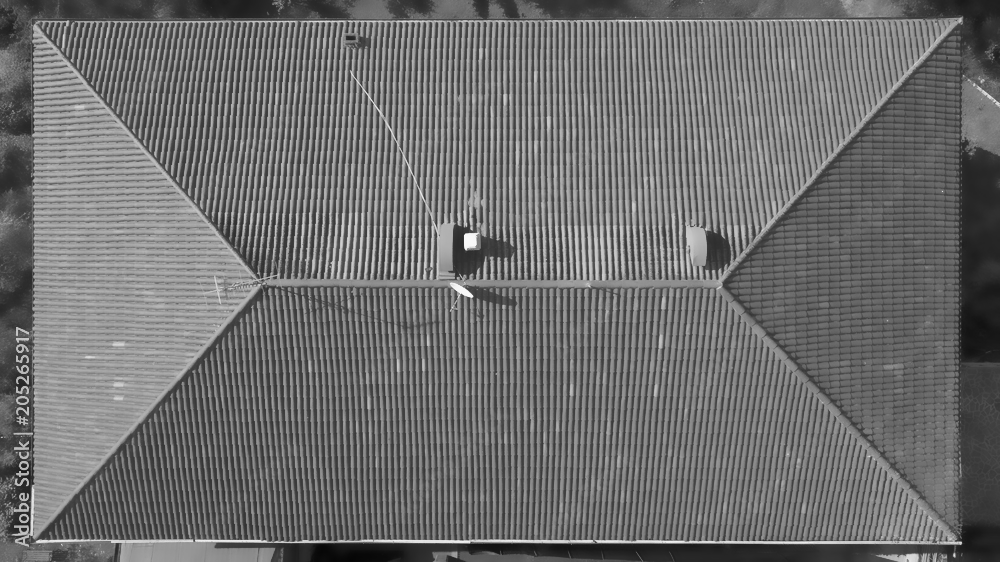

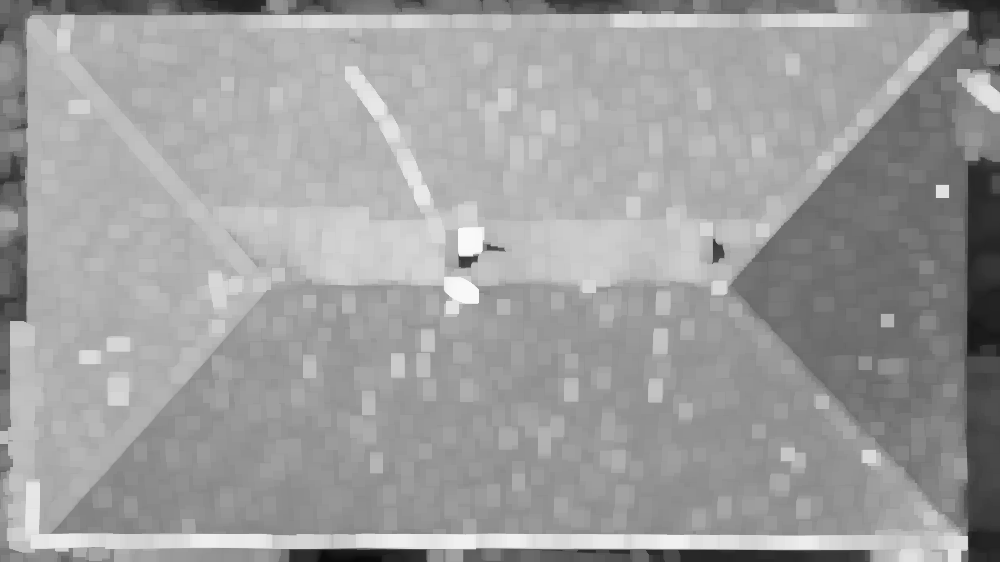

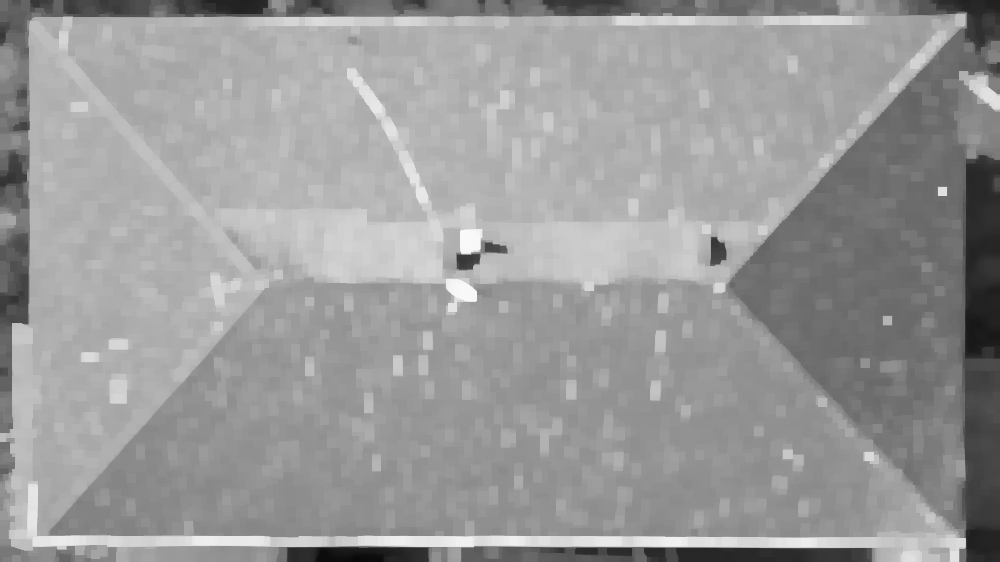

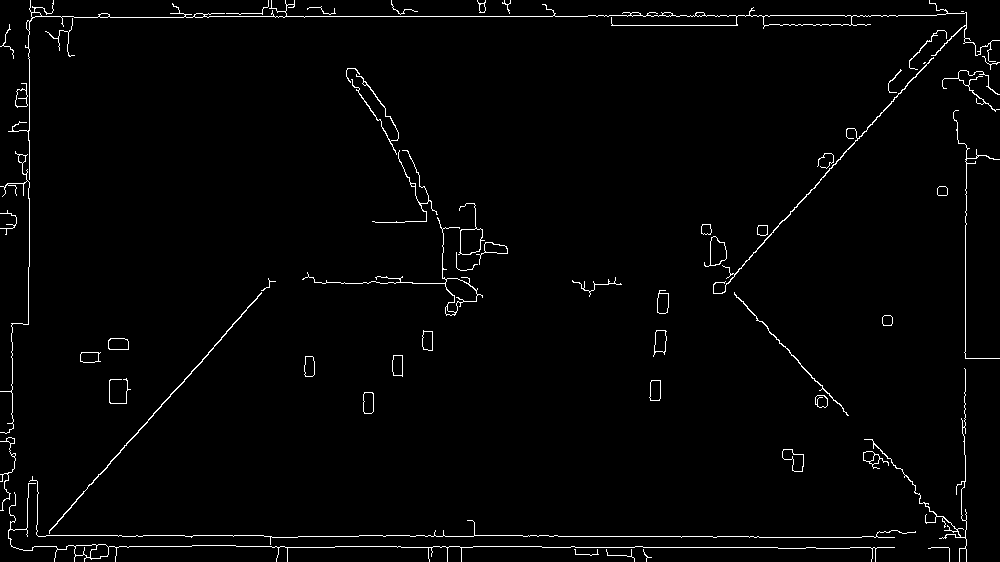

Number of Contours found = 57
area 3.5
area 1.0
area 2.0
area 0.0
area 410.5
area 8.0
area 160.5
area 273.0
area 59.5
area 126.5
area 203.5
area 198.0
area 6.5
area 68.0
area 181.0
area 192.5
area 174.0
area 212.5
area 225.5
area 178.0
area 93.0
area 87.0
area 201.5
area 208.5
area 3.5
area 11.0
area 2.0
area 199.0
area 362.5
area 94.5
area 89.0
area 691.5
area 6.0
area 498.5
area 85.0
area 4.0
area 66.5
area 37.5
area 16.5
area 176.0
area 71.5
area 32.5
area 11.5
area 8.0
area 1.0
area 173.0
area 3.5
area 21.5
area 8.0
area 8.0
area 0.0
area 3.0
area 6.0
area 50.5
area 5.0
area 1.5
area 1136.0
Total found after area threshold =  21


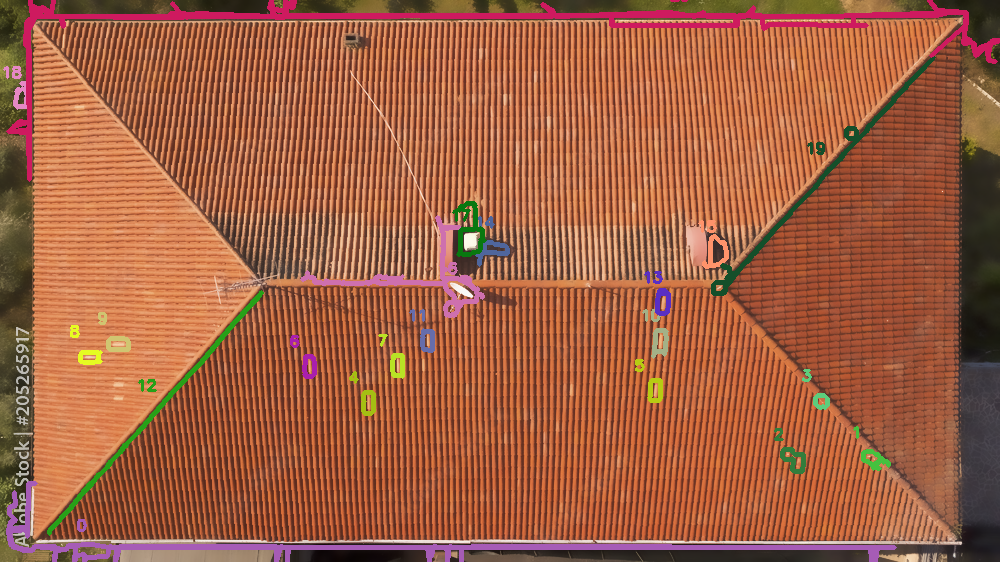

In [32]:
import cv2
import numpy as np
from scipy import misc
from scipy.ndimage import gaussian_filter
from scipy.signal import medfilt2d
import random





image = "large_horizontal_roof.jpg"
image_p = "large_horizontal_roof.jpg"

image = "pristine_rooftop_sample.png"
image_p = "pristine_rooftop_sample.png"

image1 = cv2.imread(image_p)
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh1)
cv2.waitKey(0)


image = cv2.bilateralFilter(image1, 15, 80, 80,None)
cv2_imshow(image)
cv2.waitKey(0)  


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
cv2_imshow(gray)
cv2.waitKey(0) 
# Find Canny edges
# edged = cv2.Canny(gray, 30, 200)
thr1=50
thr2=200


kernel = np.ones((5,5 ),np.float32)/49
# gray = cv2.filter2D(gray,-1,kernel)

# kernel = np.ones((3,3), np.uint8)

gray = cv2.dilate(gray, kernel, iterations=3)

cv2_imshow(gray)
cv2.waitKey(0)

gray = cv2.erode(gray, kernel, iterations=1)

cv2_imshow(gray)
cv2.waitKey(0)


edged = cv2.Canny(gray, thr1, thr2)
cv2_imshow(edged)
cv2.waitKey(0)
kernel = np.ones((3,3), np.uint8)


contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


  
print("Number of Contours found = " + str(len(contours)))


cntFound = 0
finalCnt = []
for cnt in contours :
    area = cv2.contourArea(cnt)
    print("area",area)
   
    # Shortlisting the regions based on there area.
    if area > 100: 
        # approx = cv2.approxPolyDP(cnt, 
        #                           0.009 * cv2.arcLength(cnt, True), True)
        
        approx = cv2.approxPolyDP(cnt,0.001 * cv2.arcLength(cnt, True), True)
        
        
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
   
        # Checking if the no. of sides of the selected region is 7.
        # if(len(approx) == 7): 
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        cv2.drawContours(image, [approx], -1, (r, g, b), 3)
        cv2.putText(image, str(cntFound), (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (r, g, b), 2)
        
        cntFound = 1 + cntFound
        finalCnt.append(cnt)

print("Total found after area threshold = ", cntFound)  
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


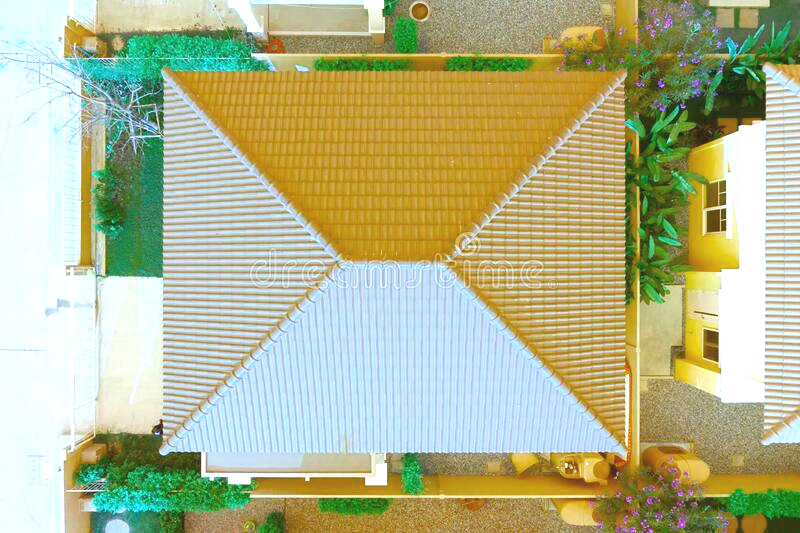

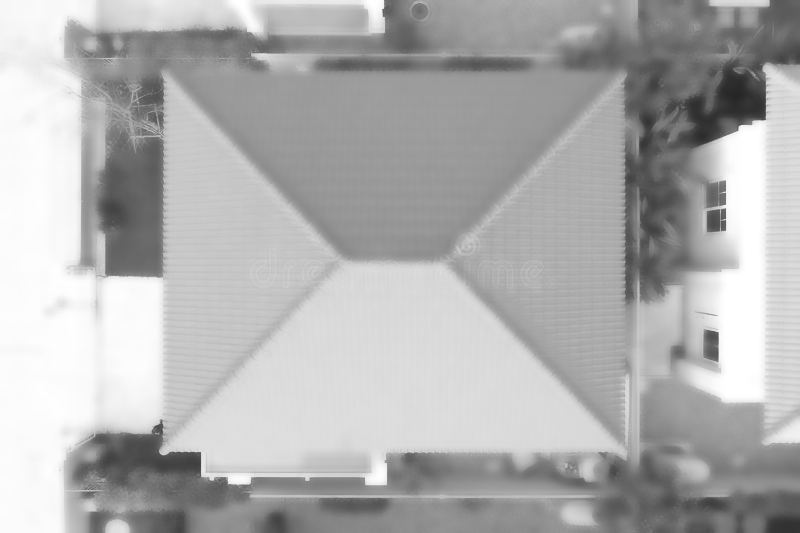

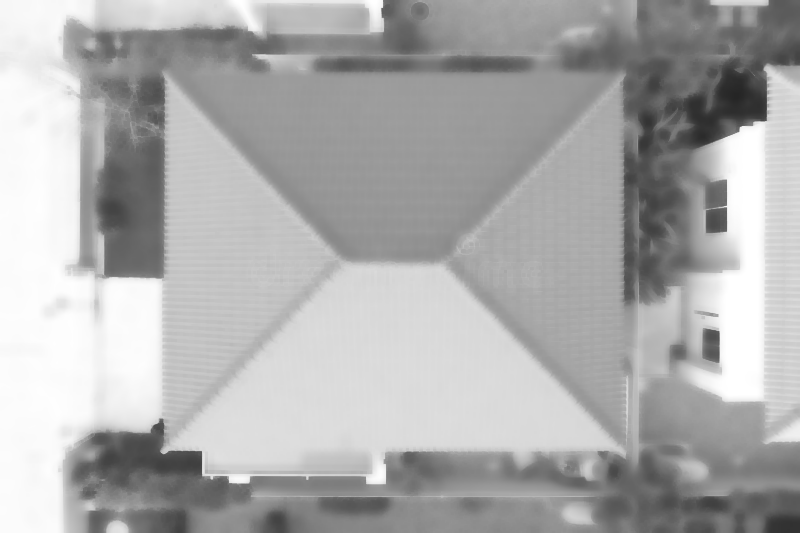

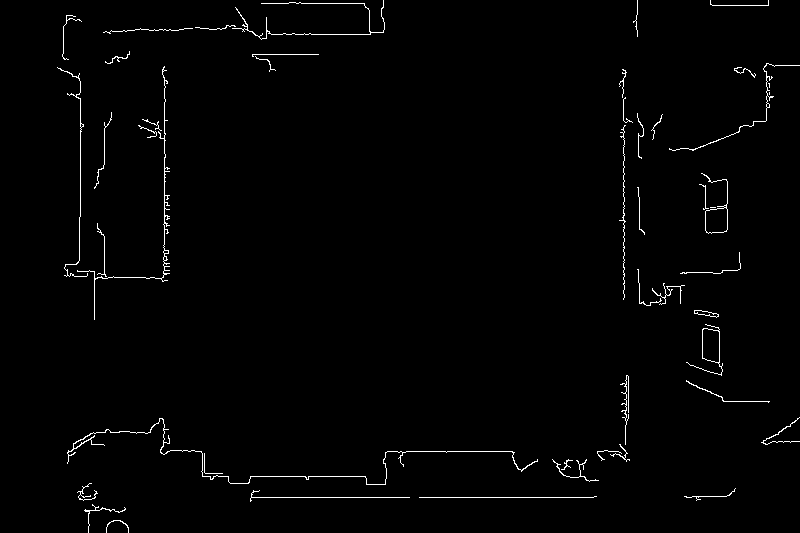

In [52]:
import PIL
image_p = "pristine_rooftop_sample.png"
# image = cv2.imread(image_p)

image = Image.open(image_p)

# #increasing the brightness 20%
# new_image = PIL.ImageEnhance.Brightness(image).enhance(1.2)

# #increasing the contrast 20%
# new_image = PIL.ImageEnhance.Contrast(image).enhance(1.2)
# display(image)
# display(new_image)
# # cv2_imshow(image)
# # cv2_imshow(new_image)

brightness = 50
contrast = 30
img = np.int16(image)
img = img * (contrast/127+1) - contrast + brightness
img = np.clip(img, 0, 255)
img = np.uint8(img)
cv2_imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bilateralFilter(img, 15, 80, 80,None)
cv2_imshow(img)


gray = cv2.erode(img, kernel, iterations=1)
cv2_imshow(gray)

edged = cv2.Canny(gray, thr1, thr2)
cv2_imshow(edged)

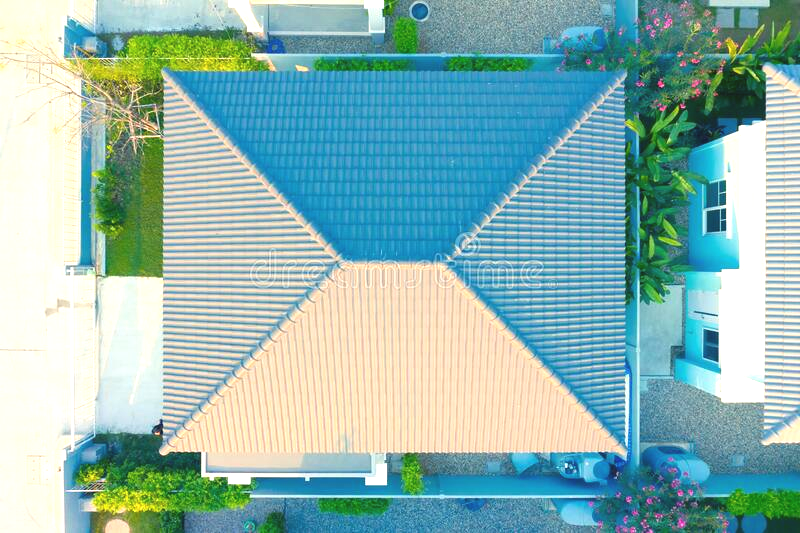

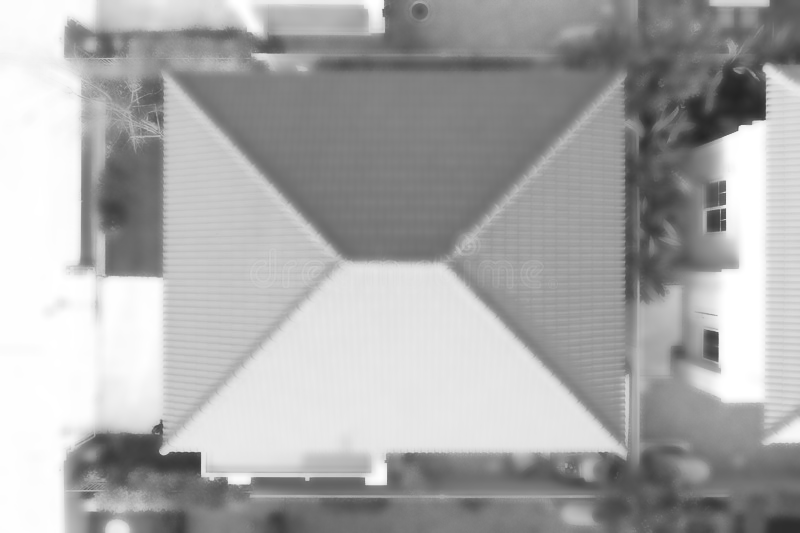

shape found
7
shape found
16
shape found
15
shape found
2
shape found
6
shape found
11
shape found
16
shape found
5
polygon found
shape found
10
shape found
18
shape found
1
shape found
2
shape found
15
shape found
1
shape found
2
shape found
4
shape found
5
polygon found
shape found
2
shape found
6
shape found
1
shape found
2
shape found
2
shape found
2
shape found
11
shape found
2
shape found
2
shape found
6
shape found
1
shape found
10
shape found
6
shape found
5
polygon found
shape found
2
shape found
8
shape found
2
shape found
2
shape found
2
shape found
1
shape found
1
shape found
4
shape found
2
shape found
7
shape found
7
shape found
8
shape found
1
shape found
2
shape found
1
shape found
4
shape found
4
shape found
22
shape found
2
shape found
1
shape found
2
shape found
4
shape found
13
shape found
13
shape found
2
shape found
4
shape found
1
shape found
1
shape found
1
shape found
21
shape found
2
shape found
13
shape found
9
shape found
5
polygon found
shape found
4
shape 

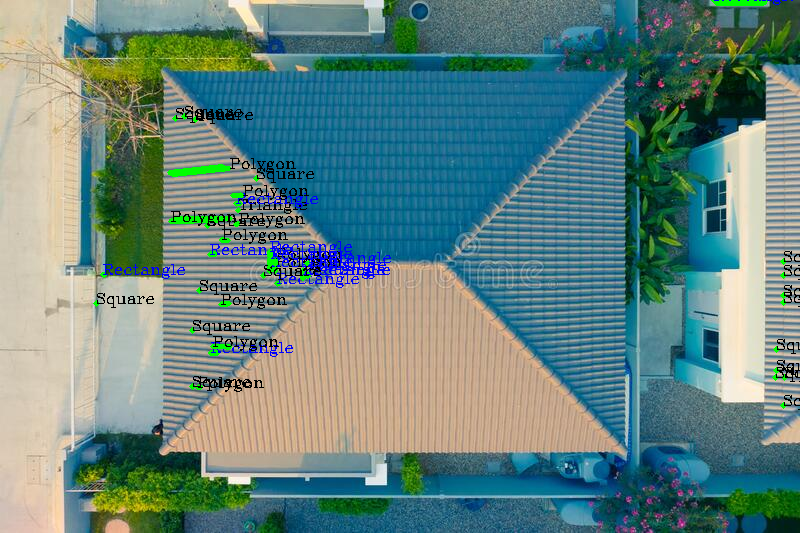

In [72]:

# Python code to detect an arrow (seven-sided shape) from an image.
import numpy as np
import cv2 as cv
   
# Reading image
image_p = "pristine_rooftop_sample.png"

image = cv.imread(image_p)
#convert image into greyscale mode
brightness = 50
contrast = 30
img = np.int16(image)
img = img * (contrast/127+1) - contrast + brightness
img = np.clip(img, 0, 255)
img = np.uint8(img)
cv2_imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bilateralFilter(img, 15, 80, 80,None)
cv2_imshow(img)

# gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#find threshold of the image
_, thrash = cv.threshold(img, 200, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thrash, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for contour in contours:
    shape = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True)
    x_cor = shape.ravel()[0]
    y_cor = shape.ravel()[1]
    print('shape found')
    print(len(shape))

    #For triangle
    if len(shape) ==3:
        print('triangle found')
        cv.drawContours(image, [shape], 0, (0,255,0), 4)
        cv.putText(image, "Triangle", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

    #for polygon
    if len(shape) ==5:
        print('polygon found')
        cv.drawContours(image, [shape], 0, (0,255,0), 4)
        cv.putText(image, "Polygon", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

    if len(shape) ==4:
        #shape cordinates
        x,y,w,h = cv.boundingRect(shape)

        #width:height
        aspectRatio = float(w)/h
        cv.drawContours(image, [shape], 0, (0,255,0), 4)
        if aspectRatio >= 0.9 and aspectRatio <=1.1:
            cv.putText(image, "Square", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        else:
            cv.putText(image, "Rectangle", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,0,0))

        
cv2_imshow(image)
cv.waitKey(0)
cv.destroyAllWindows()